**Artificial Neural Network(인공 신경망)**

# Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris

import tensorflow as tf
from tensorflow import keras

In [2]:
tf.__version__  # Google Colab의 Tensorflow 버전 확인

'2.4.1'

In [3]:
keras.__version__  # Google Colab의 tensorflow.keras 

'2.4.0'

# Iris Data

In [4]:
iris_data, iris_target = load_iris(return_X_y=True)

In [5]:
iris_data.shape, iris_target.shape

((150, 4), (150,))

In [6]:
iris_data[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [7]:
np.unique(iris_target, return_counts=True)

(array([0, 1, 2]), array([50, 50, 50]))

샘플의 변수는 2개로 축소, 타겟(0:setosa, 1:non-setosa)

In [8]:
X = iris_data[:, -2:]
y = (iris_target != 0).astype(np.int32)

In [9]:
X[:5]

array([[1.4, 0.2],
       [1.4, 0.2],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.4, 0.2]])

In [10]:
np.unique(y, return_counts=True)

(array([0, 1], dtype=int32), array([ 50, 100]))

## Single-layer 신경망 

In [11]:
# 신경망 모델 생성 - 설계
model = keras.Sequential(layers=[keras.layers.Dense(units=1, activation='sigmoid', input_shape=(2,))], 
                         name='iris_single_layer')

* `keras.Sequential` 클래스: 신경망 모델(input-hidden-output layer)
* `keras.layers.Dense` 클래스: Dense 층(한 개 이상의 unit(neuron)으로 이루어진 층)
    * `units` 파라미터: dense layer가 갖는 유닛의 개수 
    * `activation` 파라미터: 활성화 함수 이름
    * `input_shape` 파라미터: 한개의 유닛으로 입력되는 input data의 shape(튜플) 
        * 신경망 모델이 찾아야 하는 파라미터(weights, bias)의 개수를 결정하기 위해서 필요

In [12]:
# 생성된 신경망 모델 요약 
model.summary()

Model: "iris_single_layer"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


In [13]:
# 신경망 모델 컴파일: optimizer, loss, metrics 등을 설정
#   optimizer: weight와 bias를 찾기위한 훈련 방법
#   loss: 비용 함수(이름)
#   metrics: 성능 평가 지표(정확도, R2 score, RMSE 등)
model.compile(optimizer='sgd', loss='binary_crossentropy', metrics='accuracy')

In [14]:
# 신경망 모델 훈련 - loss를 줄여주는, metrics를 크게 만들어주는 weight와 bias를 찾는 과정 
model.fit(X, y, epochs=10)

Epoch 1/10
5/5 [==============================] - 3s 3ms/step - loss: 0.6284 - accuracy: 0.6797
Epoch 2/10
5/5 [==============================] - 0s 3ms/step - loss: 0.6256 - accuracy: 0.6814
Epoch 3/10
5/5 [==============================] - 0s 3ms/step - loss: 0.5506 - accuracy: 0.7079
Epoch 4/10
5/5 [==============================] - 0s 3ms/step - loss: 0.6198 - accuracy: 0.6636
Epoch 5/10
5/5 [==============================] - 0s 3ms/step - loss: 0.6218 - accuracy: 0.6584
Epoch 6/10
5/5 [==============================] - 0s 3ms/step - loss: 0.6612 - accuracy: 0.6311
Epoch 7/10
5/5 [==============================] - 0s 3ms/step - loss: 0.6174 - accuracy: 0.6489
Epoch 8/10
5/5 [==============================] - 0s 3ms/step - loss: 0.5727 - accuracy: 0.6645
Epoch 9/10
5/5 [==============================] - 0s 3ms/step - loss: 0.5819 - accuracy: 0.6541
Epoch 10/10
5/5 [==============================] - 0s 3ms/step - loss: 0.5661 - accuracy: 0.6549


In [15]:
# 신경망 모델의 훈련이 끝난 후 파라미터들(weight, bias)
model.weights

[<tf.Variable 'dense/kernel:0' shape=(2, 1) dtype=float32, numpy=
 array([[0.8480287],
        [1.1496174]], dtype=float32)>,
 <tf.Variable 'dense/bias:0' shape=(1,) dtype=float32, numpy=array([-0.13720515], dtype=float32)>]

In [16]:
# 훈련된 모델 평가
model.evaluate(X, y)

5/5 [==============================] - 0s 3ms/step - loss: 0.5406 - accuracy: 0.6667


[0.540565013885498, 0.6666666865348816]

In [17]:
# 훈련된 모델을 사용해서 예측
model.predict(X[[0, 50, 100]])
#> 이진 분류(binary class classification)에서 predict() 메서드는 양성 샘플(class=1, non-setosa)이 될 확률을 리턴
#> (비교) scikit-learn 패키지의 머신러닝 클래스들의 predict() 메서드는 예측 결과를 리턴함 

array([[0.78244275],
       [0.995756  ],
       [0.9996006 ]], dtype=float32)

In [18]:
model.predict_proba(X[[0, 50, 100]])
#> deprecated: 미래에 없어질 예정인 기능

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


array([[0.78244275],
       [0.995756  ],
       [0.9996006 ]], dtype=float32)

In [19]:
model.predict_classes(X[[0, 50, 100]])
#> deprecated: 미래에 없어질 예정인 기능

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([[1],
       [1],
       [1]], dtype=int32)

## DNN(Deep Neural Network) 
Hidden layer(은닉층)이 한개 이상인 신경망 모델 

In [20]:
# 모델 생성
model2 = keras.Sequential(name='iris2_layers')

In [21]:
# Sequential 객체에 hidden layer를 추가
model2.add(keras.layers.Dense(units=10, activation='sigmoid', input_shape=(2,)))
# hidden layer 뒤에 output layer를 추가 
model2.add(keras.layers.Dense(units=1, activation='sigmoid'))
# 첫번째 layer에서만 input_shape을 결정해 주면, 
# 두번째부터 연결되는 layer에서는 input_shape이 자동으로 계산돼서 결정됨 

In [22]:
# 생성된 모델 정보 요약
model2.summary()

Model: "iris2_layers"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                30        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 11        
Total params: 41
Trainable params: 41
Non-trainable params: 0
_________________________________________________________________


In [23]:
# 모델 컴파일: 최적화 알고리즘, 손실 함수, 평가 지표 등을 설정
model2.compile(optimizer='sgd', loss='binary_crossentropy', metrics='accuracy')

In [24]:
# 모델 훈련
model2.fit(X, y, epochs=10) 

Epoch 1/10
5/5 [==============================] - 0s 3ms/step - loss: 0.9737 - accuracy: 0.3394
Epoch 2/10
5/5 [==============================] - 0s 3ms/step - loss: 0.9326 - accuracy: 0.3299
Epoch 3/10
5/5 [==============================] - 0s 3ms/step - loss: 0.8721 - accuracy: 0.3516
Epoch 4/10
5/5 [==============================] - 0s 3ms/step - loss: 0.8312 - accuracy: 0.3594
Epoch 5/10
5/5 [==============================] - 0s 3ms/step - loss: 0.8267 - accuracy: 0.3181
Epoch 6/10
5/5 [==============================] - 0s 3ms/step - loss: 0.7636 - accuracy: 0.3694
Epoch 7/10
5/5 [==============================] - 0s 3ms/step - loss: 0.7641 - accuracy: 0.3238
Epoch 8/10
5/5 [==============================] - 0s 3ms/step - loss: 0.7387 - accuracy: 0.3216
Epoch 9/10
5/5 [==============================] - 0s 3ms/step - loss: 0.7245 - accuracy: 0.3030
Epoch 10/10
5/5 [==============================] - 0s 3ms/step - loss: 0.6887 - accuracy: 0.3607


In [25]:
model2.weights
#> tf.Variable 클래스의 객체들을 저장하고 있는 리스트 

[<tf.Variable 'dense_1/kernel:0' shape=(2, 10) dtype=float32, numpy=
 array([[-0.11193825,  0.6651454 , -0.40404847, -0.47255   ,  0.56730294,
         -0.40904003, -0.02207436,  0.64536715, -0.39238915, -0.03717711],
        [-0.25959054,  0.43775257,  0.6375253 ,  0.584244  ,  0.6610591 ,
         -0.56885326,  0.4442898 , -0.29091692,  0.62553674, -0.6237342 ]],
       dtype=float32)>,
 <tf.Variable 'dense_1/bias:0' shape=(10,) dtype=float32, numpy=
 array([ 2.2613681e-03,  1.7000451e-05, -7.9896441e-03, -1.6977619e-02,
         1.3811662e-03,  1.7833084e-04, -8.7977853e-03,  3.9124762e-04,
        -9.8401075e-03, -2.9012968e-03], dtype=float32)>,
 <tf.Variable 'dense_2/kernel:0' shape=(10, 1) dtype=float32, numpy=
 array([[ 0.09772193],
        [ 0.05947037],
        [-0.22391088],
        [-0.59908676],
        [-0.19089974],
        [-0.42903936],
        [-0.21673323],
        [ 0.27278763],
        [-0.27067304],
        [-0.1047202 ]], dtype=float32)>,
 <tf.Variable 'dense_2/b

In [26]:
model2.weights[0]  #> 입력 데이터들이 첫번재 layer로 입력될 때 곱해지게 될 Weight 텐서 

<tf.Variable 'dense_1/kernel:0' shape=(2, 10) dtype=float32, numpy=
array([[-0.11193825,  0.6651454 , -0.40404847, -0.47255   ,  0.56730294,
        -0.40904003, -0.02207436,  0.64536715, -0.39238915, -0.03717711],
       [-0.25959054,  0.43775257,  0.6375253 ,  0.584244  ,  0.6610591 ,
        -0.56885326,  0.4442898 , -0.29091692,  0.62553674, -0.6237342 ]],
      dtype=float32)>

In [27]:
model2.weights[1]  #> 입력 데이터들이 첫번재 layer로 입력될 때 더해지게 될 bias 텐서(tensor)

<tf.Variable 'dense_1/bias:0' shape=(10,) dtype=float32, numpy=
array([ 2.2613681e-03,  1.7000451e-05, -7.9896441e-03, -1.6977619e-02,
        1.3811662e-03,  1.7833084e-04, -8.7977853e-03,  3.9124762e-04,
       -9.8401075e-03, -2.9012968e-03], dtype=float32)>

In [28]:
model2.weights[2]

<tf.Variable 'dense_2/kernel:0' shape=(10, 1) dtype=float32, numpy=
array([[ 0.09772193],
       [ 0.05947037],
       [-0.22391088],
       [-0.59908676],
       [-0.19089974],
       [-0.42903936],
       [-0.21673323],
       [ 0.27278763],
       [-0.27067304],
       [-0.1047202 ]], dtype=float32)>

In [29]:
# 평가
model2.evaluate(X, y)

5/5 [==============================] - 0s 3ms/step - loss: 0.6824 - accuracy: 0.3333


[0.6823723316192627, 0.3333333432674408]

In [30]:
# 예측
preds = model2.predict(X)
preds[[0, 1, 50, 51, 100, 101]]

array([[0.3978952 ],
       [0.3978952 ],
       [0.46850896],
       [0.45998982],
       [0.4645073 ],
       [0.4624805 ]], dtype=float32)

## Iris 다중 클래스 분류

In [31]:
iris_target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [32]:
model = keras.Sequential() # 신경망 생성

In [33]:
# 출력층 추가: 다중 클래스 분류인 경우 활성화 함수는 
model.add(keras.layers.Dense(units=3, activation='softmax', input_shape=(4,)))

In [34]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 3)                 15        
Total params: 15
Trainable params: 15
Non-trainable params: 0
_________________________________________________________________


In [35]:
# 모델 컴파일
model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics='accuracy')
#> multinomial(다중 클래스) 분류이고, 타겟이 one-hot encoding이 되어 있지 않은 경우,
# 손실함수는 sparse_categorical_crossentropy를 사용
# one-hot encoding되어 있는 경우에는, categorical_crossentropy를 사용 

In [36]:
# 모델 훈련
model.fit(iris_data, iris_target, epochs=10)

Epoch 1/10
5/5 [==============================] - 0s 2ms/step - loss: 4.7826 - accuracy: 0.3468
Epoch 2/10
5/5 [==============================] - 0s 3ms/step - loss: 2.8724 - accuracy: 0.3611
Epoch 3/10
5/5 [==============================] - 0s 2ms/step - loss: 1.4900 - accuracy: 0.3468
Epoch 4/10
5/5 [==============================] - 0s 2ms/step - loss: 1.0016 - accuracy: 0.3339
Epoch 5/10
5/5 [==============================] - 0s 2ms/step - loss: 0.8449 - accuracy: 0.2797
Epoch 6/10
5/5 [==============================] - 0s 2ms/step - loss: 0.7743 - accuracy: 0.5017
Epoch 7/10
5/5 [==============================] - 0s 2ms/step - loss: 0.7123 - accuracy: 0.5597
Epoch 8/10
5/5 [==============================] - 0s 2ms/step - loss: 0.6898 - accuracy: 0.5276
Epoch 9/10
5/5 [==============================] - 0s 2ms/step - loss: 0.6829 - accuracy: 0.5252
Epoch 10/10
5/5 [==============================] - 0s 3ms/step - loss: 0.6725 - accuracy: 0.4977


# Fashion MNIST 

In [37]:
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [38]:
x_train.shape, y_train.shape
#> data shape: (n_samples, height, width), target shape: (n_samples,)

((60000, 28, 28), (60000,))

In [39]:
x_test.shape, y_test.shape

((10000, 28, 28), (10000,))

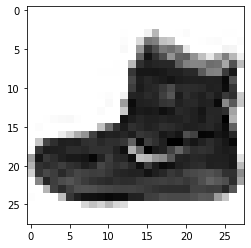

In [40]:
plt.imshow(x_train[0], cmap=plt.cm.binary)
plt.show()

In [41]:
y_train[0]

9

In [42]:
np.unique(y_train, return_counts=True)
#> 각 클래스(카테고리)에 속하는 샘플들의 개수가 모두 같음 

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]))

In [43]:
np.unique(y_test, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000]))

In [44]:
# 이미지들의 배열을 전달받아서, 
# row의 개수는 이미지의 개수에 따라서 조절되도록
# 이미지를 출력하는 함수 

def plot_fashion_items(img_arr, ncols=10):
    n = len(img_arr)
    nrows = int(np.ceil(n / ncols))
    fig, ax = plt.subplots(nrows, ncols, figsize=(ncols, nrows))
    for i in range(nrows):
        for j in range(ncols):
            idx = i * ncols + j
            if nrows == 1: # row의 개수가 1이면 subplot은 ax
                if idx < n: # 이미지의 인덱스는 이미지의 개수보다 클 수 없음
                    ax[idx].imshow(img_arr[idx], cmap=plt.cm.binary)
                ax[idx].axis('off')
            else: # row의 개수가 2 이상이면 subplot ax는 2차원 배열
                if idx < n:
                    ax[i, j].imshow(img_arr[idx], cmap=plt.cm.binary)
                ax[i, j].axis('off')

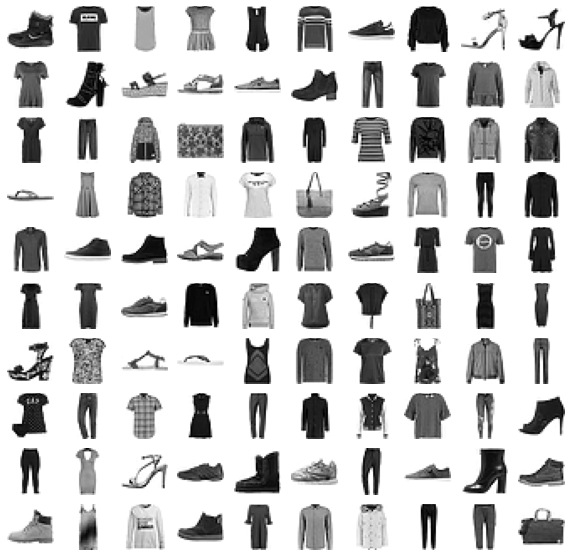

In [45]:
plot_fashion_items(x_train[:100])

In [46]:
# 이미지 배열은 0 ~ 255 숫자로 이루어져 있음 -> 0 ~ 1 사이의 범위로 스케일링 
x_train_scaled = x_train / 255
x_test_scaled = x_test / 255

## Single Layer NN 

In [47]:
# 모델 생성
model = keras.Sequential()

In [48]:
# Flatten layer 추가: (28, 28) 모양의 2차원 배열을 (28x28), 모양의 1차원 배열로 변환 후 출력(다음 layer로 전달)
model.add(keras.layers.Flatten(input_shape=(28, 28)))
# 출력층(output layer) 추가 
model.add(keras.layers.Dense(units=10, activation='softmax'))
#> Dense: units=layer의 뉴런 개수=layer의 출력 개수=출력층인 경우 타겟의 클래스 개수와 일치해야 함!
#> Dense: activation=활성화(2진분류: sigmoid, 다중클래스분류:softmax)
#> Dense: input_shape=(784,) - Flatten layer와 연결되어 있기 때문에, 자동 계산 가능


In [49]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [50]:
# 모델 컴파일
model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics='accuracy')

In [51]:
# 모델 훈련 
model.fit(x=x_train_scaled, y=y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 1.0745 - accuracy: 0.6629
Epoch 2/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.6081 - accuracy: 0.8060
Epoch 3/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5503 - accuracy: 0.8180
Epoch 4/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5215 - accuracy: 0.8281
Epoch 5/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5024 - accuracy: 0.8311


In [52]:
# 모델 평가
model.evaluate(x_test_scaled, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.5268 - accuracy: 0.8167


[0.5267623662948608, 0.8166999816894531]

## DNN

* flatten layer: 2차원 배열을 1차원 배열로 변환 출력
* hidden layer: 100개 unit
    * 모든 hidden layer에서는 활성화 함수로 sigmoid를 사용
* output layer
    * 활성화 함수: ?
* 최적화 알고리즘은 기본값인 'rmsprop'을 사용 

In [53]:
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28, 28)))  # flatten layer
model.add(keras.layers.Dense(units=100, activation='sigmoid'))  # hidden layer
model.add(keras.layers.Dense(units=10, activation='softmax'))  # output layer
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_6 (Dense)              (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [54]:
# 모델 컴파일
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')

In [55]:
# 모델 훈련 
model.fit(x_train_scaled, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7115 - accuracy: 0.7672
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4093 - accuracy: 0.8522
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3638 - accuracy: 0.8692
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3445 - accuracy: 0.8750
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3265 - accuracy: 0.8836


In [56]:
# 모델 평가 
model.evaluate(x_test_scaled, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3854 - accuracy: 0.8607


[0.38544565439224243, 0.8607000112533569]

## DNN2 

In [57]:
def create_model(image_size=(28, 28), layer=None): 
    model = keras.Sequential()  # 모델 생성
    model.add(keras.layers.Flatten(input_shape=image_size))
    # Hidden layer 추가(units=100, activation='relu')
    model.add(keras.layers.Dense(units=100, activation='relu'))
    if layer:  # 추가하려는 layer가 argument로 전달됐을 때 
        model.add(layer) 
    # output layer 추가
    model.add(keras.layers.Dense(units=10, activation='softmax'))

    return model 

In [58]:
# create model 함수를 사용해서 신경망 모델 생성, 컴파일, 훈련, 평가 
model = create_model()
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_8 (Dense)              (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [59]:
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')

In [60]:
model.fit(x_train_scaled, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6385 - accuracy: 0.7770
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3944 - accuracy: 0.8583
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3533 - accuracy: 0.8738
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3269 - accuracy: 0.8845
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3224 - accuracy: 0.8882


In [61]:
model.evaluate(x_test_scaled, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.4021 - accuracy: 0.8647


[0.4020768404006958, 0.8647000193595886]

In [62]:
# 위와 동일한 모델을 새로 생성하고, optimizer='adam' 사용해서 훈련, 평가 
model = create_model()
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
model.fit(x_train_scaled, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6546 - accuracy: 0.7729
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3876 - accuracy: 0.8602
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3429 - accuracy: 0.8756
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3230 - accuracy: 0.8807
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2994 - accuracy: 0.8901


In [63]:
model.evaluate(x_test_scaled, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3638 - accuracy: 0.8680


[0.36376166343688965, 0.8679999709129333]